### Comparison on performances between K-nearest neigbours, decision tree, and support vector machine on blob dataset 

In [19]:
###RANDOM FOREST

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [21]:
# Step 1: Create Datasets

In [22]:
from sklearn.datasets import make_blobs, make_circles


class DatasetCreator:
    @staticmethod
    def create_blob_dataset() -> dict:
        n_samples_1 = 1000
        n_samples_2 = 100
        centers = [[0.0, 0.0], [2.0, 2.0]]
        cluster_std = [1.5, 0.5]

        X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                          centers=centers,
                          cluster_std=cluster_std,
                          random_state=0,
                          shuffle=False)

        return {'X': X, 'y': y}

    @staticmethod
    def create_make_circles_dataset() -> dict:
        X, y = make_circles(500, factor=0.1, noise=0.1)
        return {'X': X, 'y': y}


In [23]:
dataset_creator = DatasetCreator()
blob_dataset = dataset_creator.create_blob_dataset()
circles_dataset = dataset_creator.create_make_circles_dataset()

In [24]:
# Step 2: Split Data into Training, Validation, and Test Sets

In [25]:
X_blob, y_blob = blob_dataset['X'], blob_dataset['y']
X_circles, y_circles = circles_dataset['X'], circles_dataset['y']

# Split blob dataset into training and temporary (remaining) data
X_blob_train_temp, X_blob_test, y_blob_train_temp, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2,
                                                                                  random_state=42)
X_blob_train, X_blob_val, y_blob_train, y_blob_val = train_test_split(X_blob_train_temp, y_blob_train_temp,
                                                                      test_size=0.25, random_state=42)

print(f"Blob Dataset:")
print(f"Train set: {X_blob_train.shape}, Validation set: {X_blob_val.shape}, Test set: {X_blob_test.shape}")

# Split circles dataset into training and temporary (remaining) data
X_circles_train_temp, X_circles_test, y_circles_train_temp, y_circles_test = train_test_split(X_circles, y_circles,
                                                                                              test_size=0.2,
                                                                                              random_state=42)
X_circles_train, X_circles_val, y_circles_train, y_circles_val = train_test_split(X_circles_train_temp,
                                                                                  y_circles_train_temp, test_size=0.25,
                                                                                  random_state=42)

print(f"\nCircles Dataset:")
print(f"Train set: {X_circles_train.shape}, Validation set: {X_circles_val.shape}, Test set: {X_circles_test.shape}")

Blob Dataset:
Train set: (660, 2), Validation set: (220, 2), Test set: (220, 2)

Circles Dataset:
Train set: (300, 2), Validation set: (100, 2), Test set: (100, 2)


In [26]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define a function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and scatter plot of data
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar()

### Support Vector Machine

In [27]:
# Train and visualize decision boundaries for SVM on blob dataset

In [28]:
svm_model_blob = SVC(kernel='linear', C=1.0)
svm_model_blob.fit(X_blob_train, y_blob_train)
svm_blob_accuracy = accuracy_score(y_blob_test, svm_model_blob.predict(X_blob_test))
print(f"Support Vector Machine Accuracy on Blob dataset is {svm_blob_accuracy}")

Support Vector Machine Accuracy on Blob dataset is 0.9545454545454546


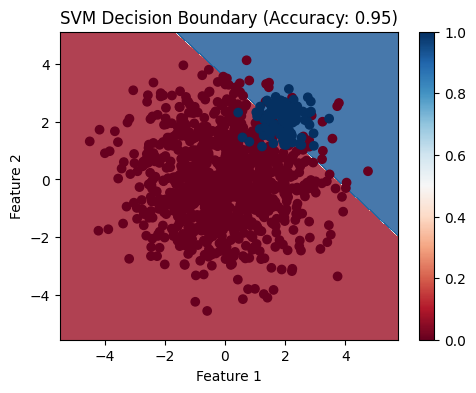

In [29]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_decision_boundary(svm_model_blob, X_blob, y_blob, title=f'SVM Decision Boundary (Accuracy: {svm_blob_accuracy:.2f})')

### Random Forest

In [30]:
### Train and visualize decision boundaries for Random Forest on blob dataset

In [31]:
rf_model_blob = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_blob.fit(X_blob_train, y_blob_train)
rf_blob_accuracy = accuracy_score(y_blob_test, rf_model_blob.predict(X_blob_test))
print(f"Random Forest Accuracy on Blob dataset is {rf_blob_accuracy}")

Random Forest Accuracy on Blob dataset is 0.9681818181818181


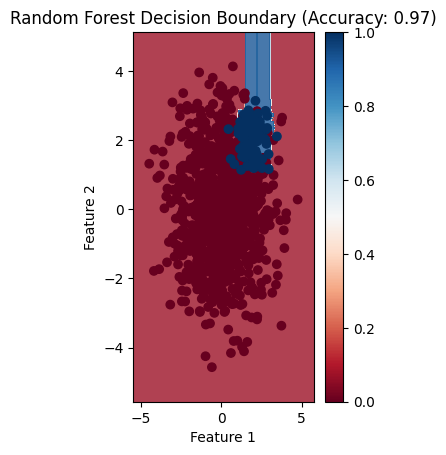

In [32]:
plt.subplot(1, 2, 2)
plot_decision_boundary(rf_model_blob, X_blob, y_blob, title=f'Random Forest Decision Boundary (Accuracy: {rf_blob_accuracy:.2f})')



K-Nearest Neighbors Accuracy on Blob dataset is 0.9727272727272728


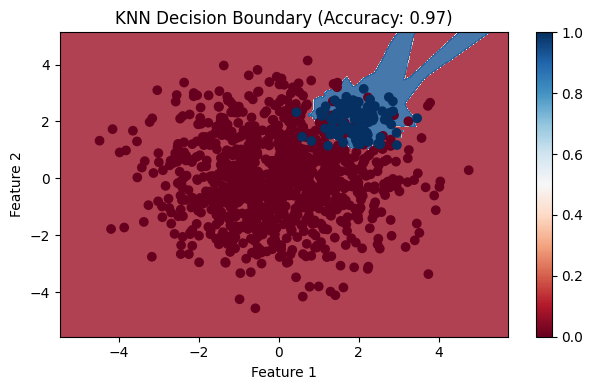

In [33]:
# Train and visualize decision boundaries for KNN on blob dataset
knn_model_blob = KNeighborsClassifier(n_neighbors=5)
knn_model_blob.fit(X_blob_train, y_blob_train)
knn_blob_accuracy = accuracy_score(y_blob_test, knn_model_blob.predict(X_blob_test))
print(f"K-Nearest Neighbors Accuracy on Blob dataset is {knn_blob_accuracy}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_decision_boundary(knn_model_blob, X_blob, y_blob, title=f'KNN Decision Boundary (Accuracy: {knn_blob_accuracy:.2f})')

plt.tight_layout()

# Step 4: Plot the Clusters

In [34]:
# Step 4: Plot the Clusters
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='.')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

### K-nearest neigbours

In [35]:
# Step 4: Plot the Clusters (using KMeans and MiniBatchKMeans just for visualization)
from sklearn.cluster import KMeans, MiniBatchKMeans

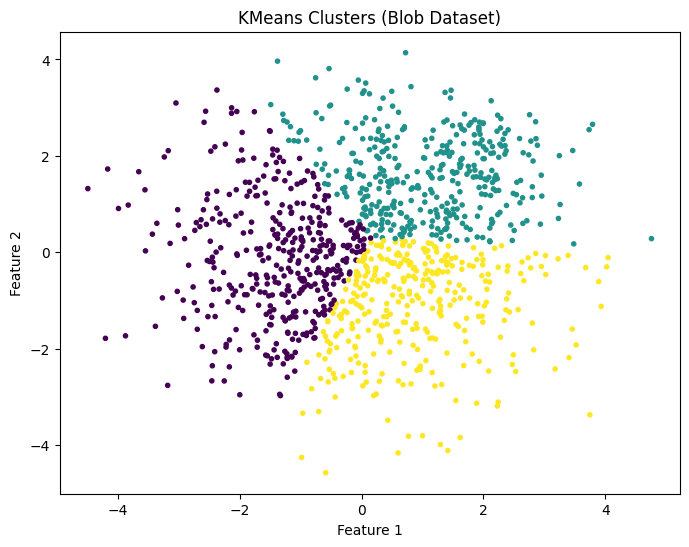

In [36]:
# Plot clusters for the blob dataset
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_blob)
kmeans_labels = kmeans.predict(X_blob)
plot_clusters(X_blob, kmeans_labels, 'KMeans Clusters (Blob Dataset)')

### MiniBatchKMeans

In [37]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=100)
minibatch_kmeans.fit(X_blob)
minibatch_kmeans_labels = minibatch_kmeans.predict(X_blob)
minibatch_accuracy = accuracy_score(y_blob_test, minibatch_kmeans.predict(X_blob_test))
print(f"Minibatch neighbours Accuracy on Blob dataset is {minibatch_accuracy}")

Minibatch neighbours Accuracy on Blob dataset is 0.42727272727272725


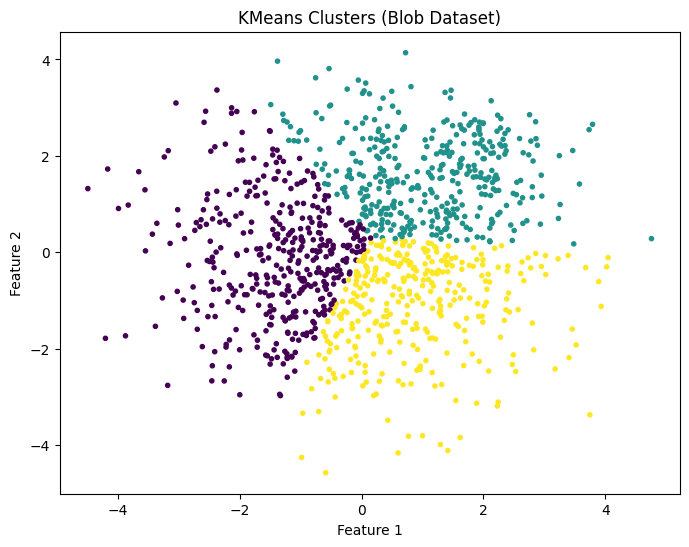

In [38]:
# Plot clusters for the blob dataset
plot_clusters(X_blob, kmeans_labels, 'KMeans Clusters (Blob Dataset)')

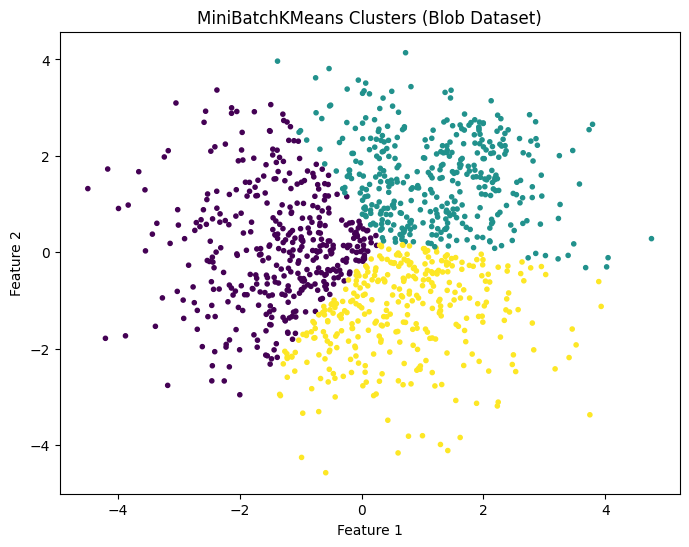

In [39]:
plot_clusters(X_blob, minibatch_kmeans_labels, 'MiniBatchKMeans Clusters (Blob Dataset)')